# Assignment: Unsupervised Machine Learning \ Clustering

## Part 1: Partitional Clustering

In this assignment you will experience with partitional & mixture model clustering. The analyses are made on real datasets under the circumstances of real life challenges in unsupervised machine learning.

In [2]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### Read blood test results as an EMR from an Excel file

In [3]:
# Open the file
xlsx = pd.ExcelFile('EMR-Blood.xlsx')

# Get the first sheet as an object
sheet1 = xlsx.parse(0)

# Set the Key column as the index
sheet1.set_index("Key", inplace=True)

# Show first 10 rows
sheet1[:10]

,Na,K,ALT,AST,WBC,RBC,Hgb,Hct
Key,,,,,,,,
1,141,4.65,31.92,35.01,10.25,4.06,17.6,36.3
2,140,4.96,36.41,16.70,6.13,3.80,13.2,35.6
3,136,3.66,41.43,13.17,5.86,4.26,16.2,43.7
4,136,4.74,23.92,30.33,10.80,4.83,16.1,49.8
5,140,4.74,43.66,20.44,6.59,4.05,12.6,39.1
6,146,3.98,48.41,33.22,4.53,4.04,17.9,47.3
7,144,5.29,44.29,19.28,10.12,3.96,17.2,47.9
8,138,4.57,50.43,16.39,4.66,4.91,13.7,41.5
9,144,3.96,31.51,34.87,4.57,4.72,15.1,47.6


### Blood Test Abbreviations
- Na == Sodium
- K == Potassium
- ALT == Alanine transaminase
- AST == Aspartate transaminase
- WBC == White blood cells
- RBC == Red blood cells
- Hgb == Hemoglobin
- Hct == Hematocrit

### Use K-Means to create clusters according to variables of uniform distribution

In [5]:
# Retrieve the K, WBC and Hgb column values from the dataset to cluster
variables1 = ["K","WBC","Hgb"]
EMR3d1 = sheet1.loc[:, variables1].values

# Run the K-Means algorithm, assuming the correct number of clusters is 5
y_pred_KMeans1 = KMeans(n_clusters=5).fit(EMR3d1).labels_

### Make a 3D chart

/var/folders/hp/1nwbq3_d6233ql5yg61wlxg02r6qjf/T/ipykernel_94028/1526041088.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


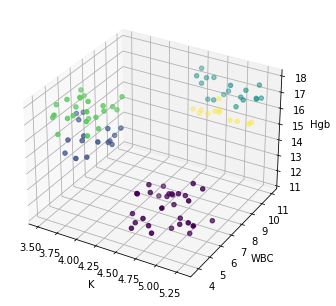

In [6]:
def make_chart (chart_data, y_pred, labels):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    ax.scatter(chart_data[:,0], chart_data[:,1], chart_data[:,2], c=y_pred)

make_chart(EMR3d1, y_pred_KMeans1, variables1)

## Task 1 (_max score - 50 points_)
Implement  Lloyd's Algorithm for solving the K-Means problem, as shown in class. 
By examining the WCSS, choose a proper threshold to determine algorithm convergence.

Check your algorithm on 'EMR-Blood.xlsx' dataset. Compare your results to the _sklearn_ version - what can affect any differences you might've got?

Fitting done - Converged after 3 iterations
Clusters data - [1 2 3 1 2 3 1 5 5 3 1 4 3 1 2 3 1 5 3 3 1 4 3 1 2 5 1 4 3 3 1 2 3 1 2 3 1
 4 3 3 1 2 3 1 4 3 1 2 3 3 1 2 3 1 4 3 1 2 3 3 1 5 3 1 4 3 1 2 3 3 1 4 3 1
 2 3 1 2 3 3 1 4 3 1 4 3 1 2 5 3 1 4 3 1 4 3 1 2 3 3]


/var/folders/hp/1nwbq3_d6233ql5yg61wlxg02r6qjf/T/ipykernel_78979/1526041088.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


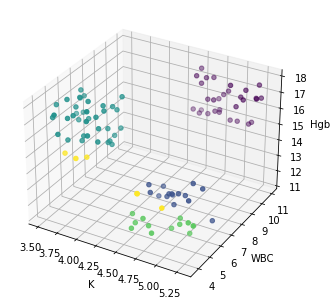

In [5]:
# Add your code for Challenge 210 after this line, and keep it in this cell.

# Implement K-Means (X being the data)
class k_means:
    def __init__(self, X, k):
        self.n_clusters = k
        self.data = X
        # Cluster initialization
        self.clusters = None
        self._reset_clusters()
        # Centroids random initialization based on random sampling
        index = np.random.choice(self.data.shape[0], self.n_clusters, replace=False)
        self.centroids = self.data[index]
        self.labels_ = None
    
    def fit(self, X, max_iterations=1000):
        """Fitting using l2 distance and Loyd's algorithm (with a default max iterations of 1000 iterations)"""
        
        iters = 0
        labels_arr = []
        
        while iters < max_iterations:
            # Reset clusters from previous iteration
            self._reset_clusters()
            labels_arr = []
            
            # Assignment step
            for sample_idx in range(len(self.data)):
                distances_from_cendtroid = k_means._dist_l2_multiple_centroids(self.data[sample_idx], self.centroids)
                closest_cluster_index = np.argmin(distances_from_cendtroid) + 1
                self.clusters[closest_cluster_index].append(self.data[sample_idx])
                labels_arr.append(closest_cluster_index)
            
            # Save old centroids
            old_centroids = self.centroids.copy()
            
            # Update centroids
            for cluster in range(self.n_clusters):
                mean = np.mean(np.array(self.clusters[cluster + 1]), axis=0)
                self.centroids[cluster] = mean

            iters += 1
            
            # Update user every 5 iterations
            if iters % 5 == 0:
                print(f"Fitting status - Completed {iters} iterations")
            
            # Stop if convereged (centroids did not change from previous iteration)
            if np.all(old_centroids == self.centroids):
                print(f"Fitting done - Converged after {iters} iterations")
                break
        
        if iters == max_iterations:
            print(f"Fitting done - Did not converge after {max_iterations} iterations")
            
        self.labels_ = np.array(labels_arr)
        return self
    
    def predict(self, X):
        pass
    
    def _reset_clusters(self):
        # Cluster initialization
        self.clusters = {cluster_id: [] for cluster_id in range(1, self.n_clusters + 1)}
    
    @staticmethod
    def _dist_l2(point, center, axis=1):
        """calculate l2 distrance between a point and a centroid."""
        d = np.linalg.norm(point - center)
        return d
    
    @staticmethod
    def _dist_l2_multiple_centroids(point, centers):
        """calculate l2 distance between a point and several cluster centers."""
        l2 = []
        for center in centers:
            norm = k_means._dist_l2(point, center)
            l2.append(norm)
        return np.array(l2)
    
    
y_pred_KMeans2 = k_means(X=EMR3d1, k=5).fit(EMR3d1).labels_
print("Clusters data - " + str(y_pred_KMeans2))
make_chart(EMR3d1, y_pred_KMeans2, variables1)

### Question: 

Check your algorithm on 'EMR-Blood.xlsx' dataset. Compare your results to the sklearn version - what can affect any differences you might've got?


### Answer:

I believe there are many implementation diffrences and that the sklearn implementation is more complex, as for start the sklearn centroids initialization default is using k-means++ that I did not implement here (giving bigger probability to select centroids with larger distnace from one another). 

I use a random centroid initialization so every time I run my implementation the results may change.

In addition, the default algorithm used by sklearn is  Elkan’s accelerated k-means algorithm which uses tiangular inequality to perform the fitting.

## Task 2 (_max score - 30 points_)

Humans can clearly spot 3 clusters, however, for machines it's much harder to "learn" that. In the above implementation, K-Means was given the value of 5 as K.
Develop a **generic** mechanism for finding the most reasonable number of clusters by:
1. Iterating K over a reasonable range, which should be derived from the number of points
2. Choose a proper K based on the heuristics learned in class
3. Showing the final clusters in a 3D chart (for your implementation of K-Means algorithm)


Fitting K-means model with k=2:
Fitting status - Completed 5 iterations
Fitting done - Converged after 9 iterations

Fitting K-means model with k=3:
Fitting status - Completed 5 iterations
Fitting done - Converged after 5 iterations

Fitting K-means model with k=4:
Fitting status - Completed 5 iterations
Fitting done - Converged after 5 iterations

Fitting K-means model with k=5:
Fitting status - Completed 5 iterations
Fitting done - Converged after 6 iterations

Fitting K-means model with k=6:
Fitting done - Converged after 4 iterations

Fitting K-means model with k=7:
Fitting done - Converged after 4 iterations

Fitting K-means model with k=8:
Fitting done - Converged after 4 iterations

Fitting K-means model with k=9:
Fitting status - Completed 5 iterations
Fitting done - Converged after 8 iterations


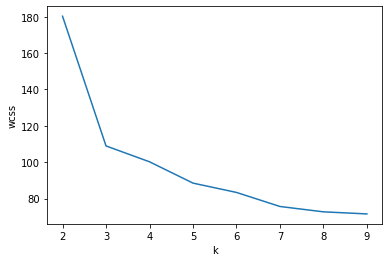

In [14]:
# Add your code for Challenge 211 after this line, and keep it in this cell.
import pandas as pd
import seaborn as sns

def get_wcss(data, labels, centroids):
    wcss = 0
    
    for idx in range(0, data.shape[0]):
        point = data[idx]
        label = labels[idx]
        centroid = centroids[label - 1]
        wcss += k_means._dist_l2(point, centroid)
    return wcss

wcss_data = []
models = []

for k in range(2, 10):
    print(f"\nFitting K-means model with k={k}:")
    fitted_model = k_means(X=EMR3d1, k=k).fit(EMR3d1)
    models.append(fitted_model)
    wcss_data.append((k, get_wcss(EMR3d1, fitted_model.labels_, fitted_model.centroids)))

df = pd.DataFrame(wcss_data, columns=['k', 'wcss'])
sns.lineplot(data=df, x='k', y='wcss');

We've used the elbow method and iterated over integers between 2<=k<=10 (as wee have 100 sample, 10 clusters should suffice) can clearly see that the "elbow" point is k=3.

Let's use k=3 to create a 3D graph of our final clusters:

/var/folders/hp/1nwbq3_d6233ql5yg61wlxg02r6qjf/T/ipykernel_78979/1526041088.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


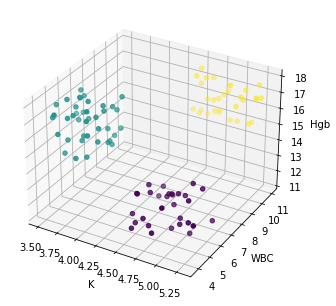

In [15]:
k=3
model = models[k-2]
make_chart(EMR3d1, model.labels_, variables1)

In [8]:
model.labels_

array([2, 1, 3, 2, 1, 3, 2, 1, 3, 3, 2, 1, 3, 2, 1, 3, 2, 1, 3, 3, 2, 1,
       3, 2, 1, 3, 2, 1, 3, 3, 2, 1, 3, 2, 1, 3, 2, 1, 3, 3, 2, 1, 3, 2,
       1, 3, 2, 1, 3, 3, 2, 1, 3, 2, 1, 3, 2, 1, 3, 3, 2, 1, 3, 2, 1, 3,
       2, 1, 3, 3, 2, 1, 3, 2, 1, 3, 2, 1, 3, 3, 2, 1, 3, 2, 1, 3, 2, 1,
       3, 3, 2, 1, 3, 2, 1, 3, 2, 1, 3, 3])

### Silhouette analysis

Use graphic visualization of the Silhouette score to support your above answer:

For K = 2 The average silhouette_score is : 0.5738344190137955


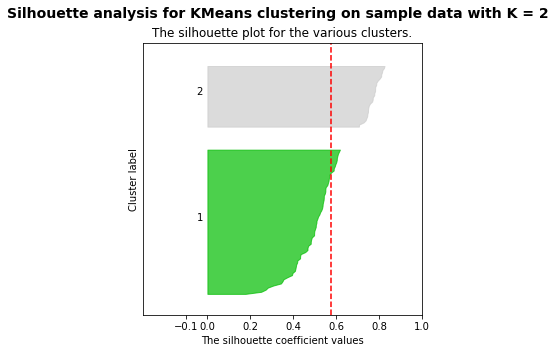

For K = 3 The average silhouette_score is : 0.644343998493909


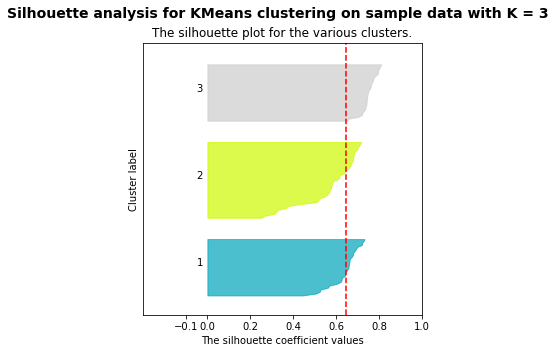

For K = 4 The average silhouette_score is : 0.5575787516420831


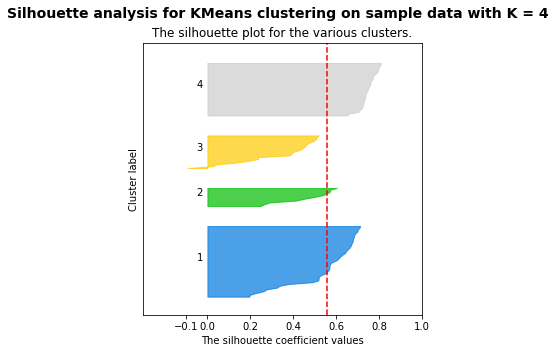

For K = 5 The average silhouette_score is : 0.4805230476750807


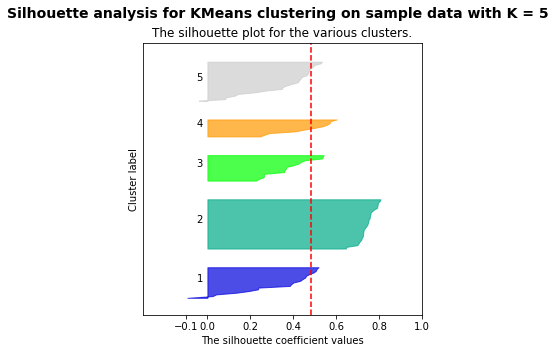

For K = 6 The average silhouette_score is : 0.5291485419915422


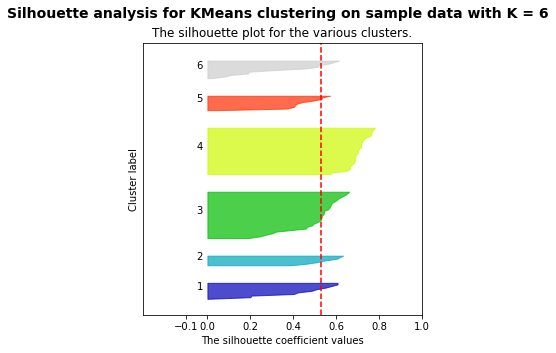

For K = 7 The average silhouette_score is : 0.3598834916325768


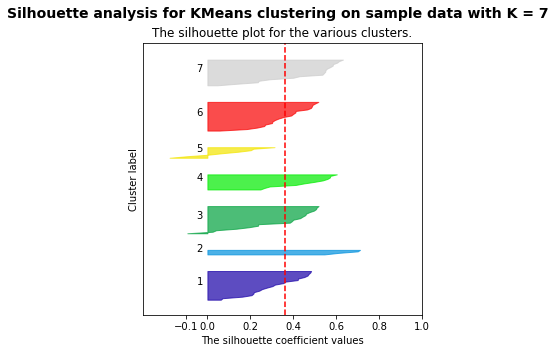

For K = 8 The average silhouette_score is : 0.4043235287290417


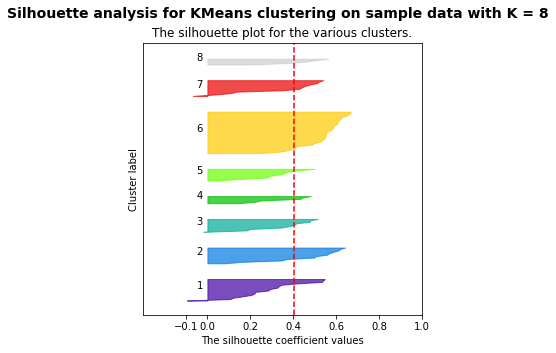

For K = 9 The average silhouette_score is : 0.4514471200194323


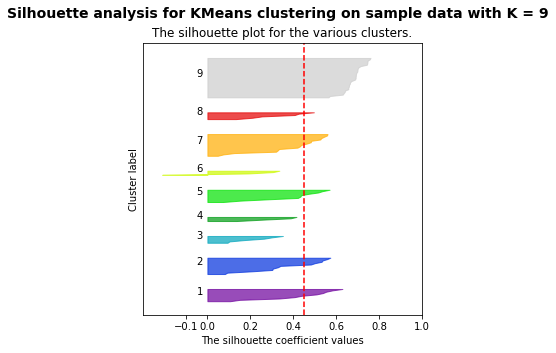

In [41]:
# Add your code for the Sillhouette graphic analysis
# You can use scikit-learn Sillhouette page as a reference

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score



def plot_Silhouette(X, y, num_clusters):
    
    # Create the plot
    fig = plt.figure(figsize=(5,5)) 
    ax = plt.gca()
    model_idx = num_clusters - 2
    
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.3, 1]
    ax.set_xlim([-0.3, 1])
    
    # The (num_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(X) + (num_clusters + 1) * 10])
    cluster_labels = y

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For K =",
        num_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(1, num_clusters+1):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / num_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    
    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with K = %d"
        % (num_clusters),
        fontsize=14,
        fontweight="bold",
    )
    
    plt.show()

    
ks = range(2, 10)
X = EMR3d1

for k in range(2, 10):
    model_idx = k - 2
    labels = models[model_idx].labels_
    plot_Silhouette(X, labels, k)

We can see that as we expected that the silhouette score is the highest for K=3 (0.644~).

We can also see that scores are above the clusters average and not fluctuate too much compared to other K values.

#### From this section on - please use the sklearn's K-means

## Part 2: Mixture Models Clustering 

### Use K-Means to create clusters according to variables of both uniform and Gaussian distributions

/var/folders/hp/1nwbq3_d6233ql5yg61wlxg02r6qjf/T/ipykernel_94028/1526041088.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


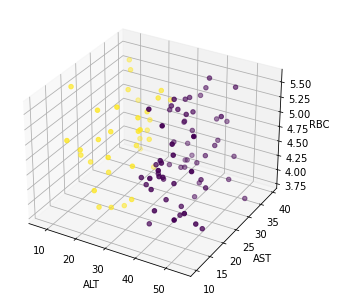

In [9]:
# Retrieve the ALT, AST and RBC column values from the dataset to cluster
variables2 = ["ALT","AST","RBC"]
EMR3d2 = sheet1.loc[:, variables2].values

# Run the K-Means algorithm
# NOTICE, this time, we know that the correct number of clusters is 2
y_pred_KMeans2 = KMeans(n_clusters=2).fit(EMR3d2).labels_

# Make a 3D chart
make_chart(EMR3d2, y_pred_KMeans2, variables2)

## Task 3 (_max score - 20 points_)
Scientists have found that in this population of patients, RBC distribution is uniform, ALT distribution is a Gaussian and AST distribution is a mixture of two Gaussians. Clearly, even by giving K-Means the correct K, the algorithm got to the wrong conclusion. This separation is "technically" correct, but lacks some underlying understanding of the natural phenomena.

What is the "problem" with this separation?

##### Your answer here
The problem is that we do not provide the classifier the information that we have regarding the AST 2 underlying Gaussians.

We could have used binning / splitting the AST feature into 2 features / etc. in order to do so and get better prediction results by providing this domain knowledge we have in the fitting process.

In order to exploit the Gaussian characteristic of the AST
1. Find the 2 componenets that comprise the AST feature by applying the GMM algorith with the proper number of components.
2. Assume that the clusters above are correct for the entire dataset (including the other features).
3. Show the final clusters (of EMR3d2) in a 3D chart

##### Find the 2 components that comprise AST feature with GMM

In [99]:
# Add your code for Challenge 212 after this line, and keep it in this cell.

from sklearn.mixture import GaussianMixture
X = EMR3d2
AST = X[:, 1].reshape(X.shape[0], 1)
gm = GaussianMixture(n_components=2, covariance_type="full", random_state=0).fit(AST)
preds = gm.predict(AST)

In [106]:
print("## The 2 gaussian's parameters -\n")
print("The 2 gaussian's means:\n" + str(gm.means_.reshape(2)))
print("The 2 gaussian's covariances:\n" + str(gm.covariances_.reshape(2)))

## The 2 gaussian's parameters -

The 2 gaussian's means:
[17.24934496 31.76263257]
The 2 gaussian's covariances:
[ 7.98567696 12.61002424]


Assuming that the clusters given by the mixture distribution of AST that we found are correct for the entire dataset lets set the clusters to:

In [107]:
preds

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1])

In [108]:
clusters = preds

#####  Show the final clusters (of EMR3d2) in 3D chart

/var/folders/hp/1nwbq3_d6233ql5yg61wlxg02r6qjf/T/ipykernel_78979/1526041088.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


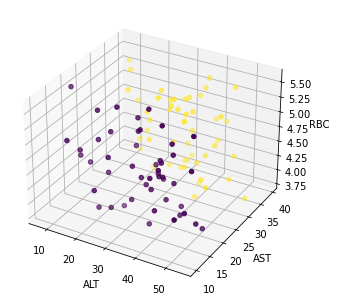

In [109]:
make_chart(EMR3d2, clusters, variables2)

What is the difference between the two clustering results above?

Which one, given the domain knowledge provided to you, makes more sense?

The difference is that in the initial clusters, we used K-means to split into 2 clusters using all the values of the 3 features, which given the base knowledge we had, was bad as we did not provide the classifier with the information of the 2 gaussians mixture in ASTs values (which makes sense to separate into 2 features / use binning / etc.).

In the second clustering, we used GMM to find the 2 gaussians underlying in ASTs feature and we clustered the data according to them (assuming that they apply to the entire data).
This makes sense to me as we know that the other 2 features distribute uniformly / normally and we also saw that the K-means normal clustering wouldn't work out of the box (in this specific case, as we saw earlier).
It also looks quite better to me when looking on the 3D graph output.




# Good Luck!

